In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# For division
from __future__ import division

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime


In [3]:
AAPL = pd.read_csv('AAPL_Training_Extracted.csv',index_col="Date",parse_dates=True)

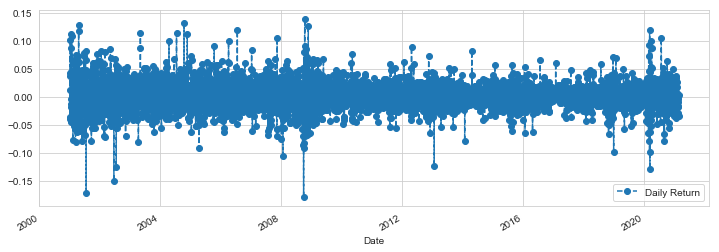

In [4]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

In [5]:
AAPL['Daily Return']

Date
2001-01-02         NaN
2001-01-03    0.100841
2001-01-04    0.041985
2001-01-05   -0.040294
2001-01-08    0.011450
2001-01-09    0.037737
2001-01-10   -0.036365
2001-01-11    0.086794
2001-01-12   -0.045139
2001-01-16   -0.003636
2001-01-17   -0.018250
2001-01-18    0.111524
2001-01-19    0.043479
2001-01-22   -0.012820
2001-01-23    0.064934
2001-01-24    0.000000
2001-01-25   -0.027437
2001-01-26   -0.018810
2001-01-29    0.108628
2001-01-30    0.002882
2001-01-31   -0.005747
2001-02-01   -0.023122
2001-02-02   -0.023667
2001-02-05   -0.021213
2001-02-06    0.046439
2001-02-07   -0.017750
2001-02-08    0.000000
2001-02-09   -0.078314
2001-02-12    0.029413
2001-02-13   -0.028572
                ...   
2021-01-14   -0.015127
2021-01-15   -0.013731
2021-01-19    0.005427
2021-01-20    0.032856
2021-01-21    0.036658
2021-01-22    0.016074
2021-01-25    0.027684
2021-01-26    0.001679
2021-01-27   -0.007684
2021-01-28   -0.034985
2021-01-29   -0.037421
2021-02-01    0.016520
2021-0

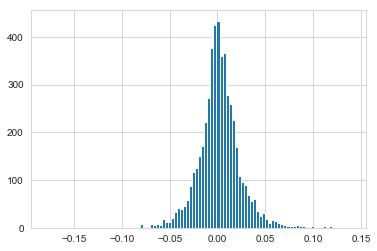

In [6]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

C:\Users\Viswa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


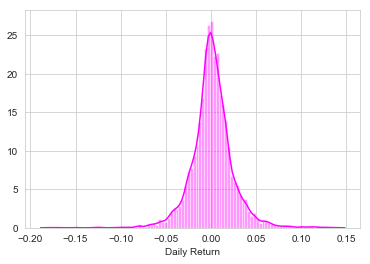

In [7]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

In [8]:
AAPL.head()

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,452312000,NaN
2001-01-03,0.258929,0.297991,0.257813,0.292411,817073600,0.100841
2001-01-04,0.323940,0.330357,0.300223,0.304688,739396000,0.041985
2001-01-05,0.302455,0.310268,0.286830,0.292411,412356000,-0.040294
2001-01-08,0.302455,0.303292,0.284598,0.295759,373699200,0.011450


In [10]:
import csv
# open input CSV file as source
# open output CSV file as result
with open("AAPL_Training.csv", "r") as source:
    reader = csv.reader(source)
        
    with open("AAPL_Close.csv", "w") as result:
        writer = csv.writer(result)
        for r in reader:
                
            # Use CSV Index to remove a column from CSV
            #r[3] = r['year']
            writer.writerow((r[0], r[4]))

In [11]:
AAPL_returns = pd.read_csv('AAPL_Close.csv',index_col="Date",parse_dates=True)

In [12]:
AAPL_returns.head()

,Close
Date,
2001-01-02,0.265625
2001-01-03,0.292411
2001-01-04,0.304688
2001-01-05,0.292411
2001-01-08,0.295759


In [13]:
# We'll use pct_change to find the percent change for each day
AAPL_returns['Close'] = AAPL['Close'].pct_change()


In [15]:
AAPL_returns.head()

,Close
Date,
2001-01-02,NaN
2001-01-03,0.100841
2001-01-04,0.041985
2001-01-05,-0.040294
2001-01-08,0.011450


In [16]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = AAPL_returns.dropna()

In [17]:
rets.head()

,Close
Date,
2001-01-03,0.100841
2001-01-04,0.041985
2001-01-05,-0.040294
2001-01-08,0.011450
2001-01-09,0.037737


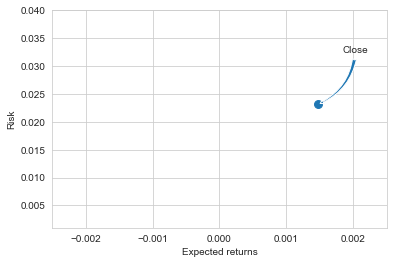

In [19]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.04])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

In [20]:
rets.head()

,Close
Date,
2001-01-03,0.100841
2001-01-04,0.041985
2001-01-05,-0.040294
2001-01-08,0.011450
2001-01-09,0.037737


In [22]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['Close']

# Now let's grab the volatility of the stock from the std() of the average return for AAPL
sigma = rets.std()['Close']

In [24]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [25]:
AAPL.head()

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,452312000,NaN
2001-01-03,0.258929,0.297991,0.257813,0.292411,817073600,0.100841
2001-01-04,0.323940,0.330357,0.300223,0.304688,739396000,0.041985
2001-01-05,0.302455,0.310268,0.286830,0.292411,412356000,-0.040294
2001-01-08,0.302455,0.303292,0.284598,0.295759,373699200,0.011450


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

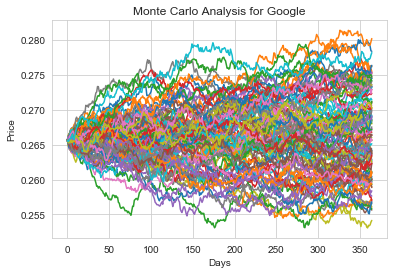

In [26]:
start_price = 0.265625

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [27]:
# Lets start with AAPL stock price
start_price =  0.265625

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

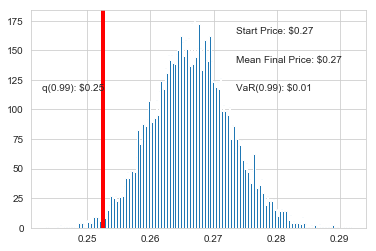

In [28]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
#plt.title(s="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold', color='Y')
